1. Acquisition

On installe les modules python

In [7]:
%pip install seaborn 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install pandas kagglehub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importation de l'ensemble de données de grande taille sur les voitures 

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("makslypko/large-cars-dataset")

print("Path to dataset files:", path)

C:\Users\izima\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\izima\.cache\kagglehub\datasets\makslypko\large-cars-dataset\versions\1


Liste des fichiers importables

In [10]:
!dir {path}

 Le volume dans le lecteur C s'appelle Windows-SSD
 Le num�ro de s�rie du volume est 6034-6E9B

 R�pertoire de C:\Users\izima\.cache\kagglehub\datasets\makslypko\large-cars-dataset\versions\1

11/06/2025  14:57    <DIR>          .
11/06/2025  14:57    <DIR>          ..
11/06/2025  14:57            39�010 Large Cars Dataset.csv
               1 fichier(s)           39�010 octets
               2 R�p(s)  290�292�576�256 octets libres


Importation des données avec pandas


In [12]:
import pandas as pd
import os

data = pd.read_csv(os.path.join(path, "large cars dataset.csv"))

On affiche les première lignes

In [13]:
data.head()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


2. Data Wrangling

Détection des données manquantes

In [19]:
# Afficher le nombre de valeurs manquantes par colonne
data.isnull()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
424,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
425,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
426,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Comptabilision le nombre de valeurs manquantes par variable

In [20]:
data.isnull().sum()

Brand           0
Model           0
VehicleClass    0
Region          0
DriveTrain      0
MSRP            0
DealerCost      0
EngineSize      0
Cylinders       0
HorsePower      0
MPG_City        0
MPG_Highway     0
Weight          0
Wheelbase       0
Length          0
dtype: int64

Regardons la fin des données

In [16]:
data.tail()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


Suppression des lignes contenant les valeurs mamquantes

In [23]:
clean = data.dropna()

Regardons les correlations

In [24]:
# Calcul et affichage de la matrice de corrélation pour les variables numériques du DataFrame clean
correlation_matrix = clean.corr(numeric_only=True)
correlation_matrix

,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.999132,0.571753,0.649366,0.826945,-0.475020,-0.439622,0.448426,0.152000,0.172037
DealerCost,0.999132,1.000000,0.564498,0.644870,0.823746,-0.470442,-0.434585,0.442332,0.148328,0.166586
EngineSize,0.571753,0.564498,1.000000,0.900702,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.649366,0.644870,0.900702,1.000000,0.810169,-0.684356,-0.676035,0.740897,0.546474,0.546308
HorsePower,0.826945,0.823746,0.787435,0.810169,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.475020,-0.470442,-0.709471,-0.684356,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.439622,-0.434585,-0.717302,-0.676035,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.448426,0.442332,0.807867,0.740897,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.152000,0.148328,0.636517,0.546474,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.172037,0.166586,0.637448,0.546308,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000


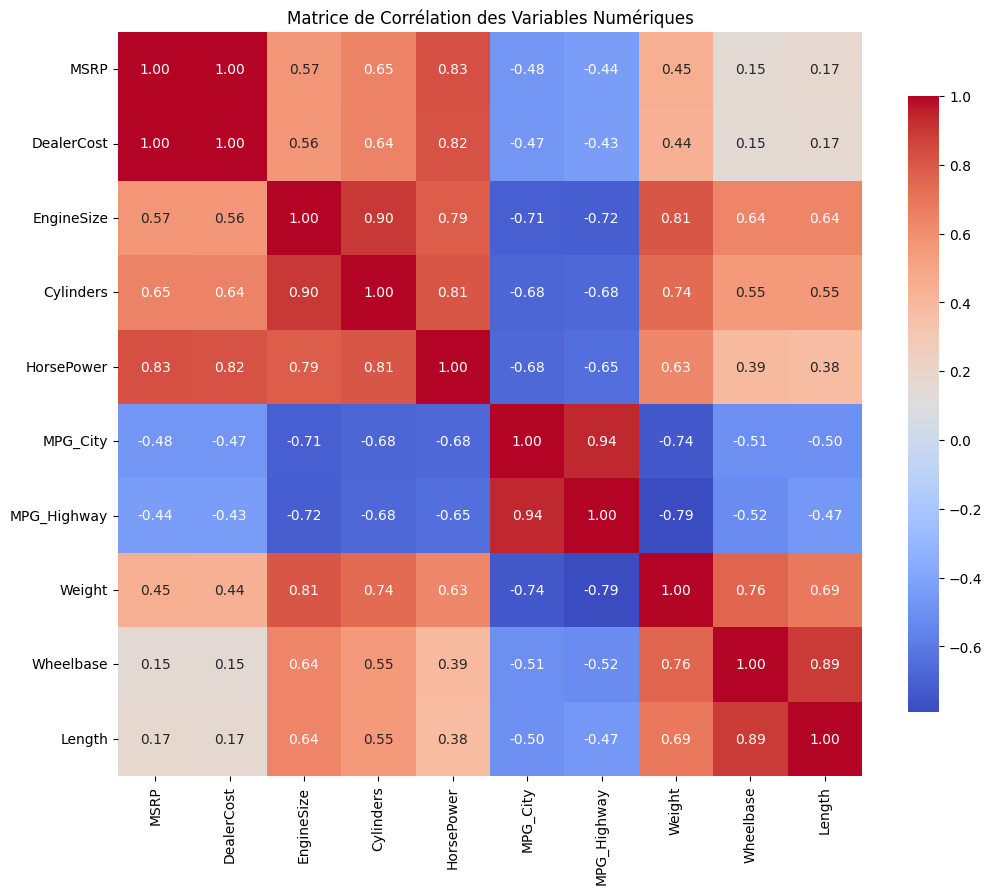

In [26]:
from seaborn import heatmap
import matplotlib.pyplot as plt
# Affichage de la matrice de corrélation avec une heatmap
plt.figure(figsize=(12, 10))    
heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matrice de Corrélation des Variables Numériques")    
plt.show()
# Afficher les types de données de chaque colonne


In [27]:
# Explication de la matrice de corrélation des variables numériques
for k, v in explications.items():
    print(f"{k} : {v}")

MSRP et DealerCost : Très fortement corrélés (0.999), ce qui est logique car le prix de vente dépend directement du coût pour le concessionnaire.
EngineSize, Cylinders, HorsePower : Corrélations élevées entre ces variables (>0.78). Plus le moteur est gros, plus il a de cylindres et de puissance.
MSRP et HorsePower : Corrélation forte (0.83) : les voitures plus puissantes coûtent généralement plus cher.
MPG_City et EngineSize/Cylinders/HorsePower : Corrélations négatives fortes (~-0.7) : plus le moteur est gros et puissant, moins la voiture est économe en ville.
MPG_City et MPG_Highway : Corrélation très forte (0.94) : une voiture économe en ville l'est aussi sur autoroute.
Weight et EngineSize/Cylinders : Corrélations positives élevées (>0.74) : les voitures plus lourdes ont souvent des moteurs plus gros.
Wheelbase et Length : Corrélation très forte (0.89) : les voitures longues ont généralement un empattement plus grand.
Weight et MPG_Highway : Corrélation négative forte (-0.79) : les

Regardons la corrélation entre Brand et Région